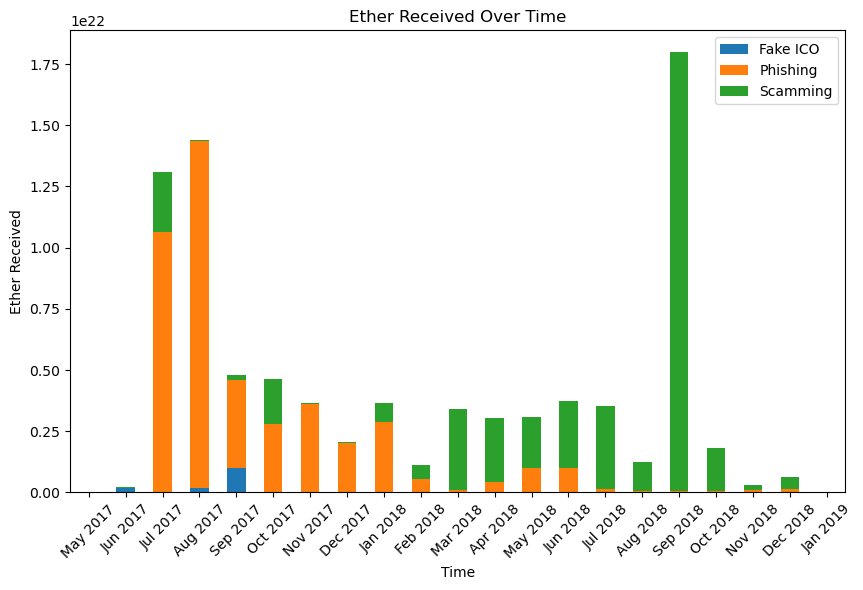

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# read the text file and create a dataframe
with open('time_data.txt', 'r') as file:
    data = eval(file.read())

# Create a list of dictionaries for each transaction
transactions = []
for item in data:
    date_str, scam_type = item[0]
    scam_type = scam_type.replace('ether', '').strip()  # remove 'ether' prefix and whitespace
    ether = item[1]
    transactions.append({
        "date": pd.to_datetime(date_str, format="%m/%Y"),
        "scam_type": scam_type,
        "ether": ether
    })

# Create a dataframe from the list of transactions
df = pd.DataFrame(transactions)

# group the data by Date and Scam Type and calculate the sum of Ether Received for each month and scam type
df_monthly = df.groupby([pd.Grouper(key='date', freq='M'), 'scam_type']).sum().unstack('scam_type').fillna(0)

# Rename the columns to only the scam type names
df_monthly.columns = df_monthly.columns.get_level_values(1)

# plot the graph
fig, ax = plt.subplots(figsize=(10, 6))

# create a stacked bar chart of the monthly Ether received by scam type
df_monthly.plot(kind='bar', stacked=True, ax=ax)

ax.set_title('Ether Received Over Time')
ax.set_xlabel('Time')
ax.set_ylabel('Ether Received')
ax.set_xticklabels(df_monthly.index.strftime('%b %Y'))
ax.tick_params(axis='x', rotation=45)

# Set the legend labels to only the scam type names
ax.legend(df_monthly.columns)
# Save plot to file
plt.savefig("plot.png", bbox_inches='tight')

plt.show()
